Bank Marketing: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Attribute information

For more information, read [Moro et al., 2011]. Input variables:- bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","bluecollar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Bank-Marketing

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [45]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from sklearn 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [46]:
bank=pd.read_csv('C:\\Users\\Dell\\Downloads\\Bank_Marketing_Data_Set.csv')
bank.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [47]:
#change the column names
bank=bank.rename(columns={'V1': 'Age','V2':'job','V3':'Martial','V4':'Education','V5':'Defaultcredit','V6':'Balance',
                          'V7':'Housing','V8':'Loan','V9':'Contact','V10':'Day',
                         'V11':'Month','V12':'Duration','V13':'Campaign','V14':'Pdays','V15':'Previous','V16':'Poutcome',
                          'Class':'Y'})

In [48]:
bank.shape

(45211, 17)

In [49]:
bank.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous,Y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [50]:
bank.head(5)

,Age,job,Martial,Education,Defaultcredit,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [51]:
#cheking for null values 
bank.isnull().sum()/len(bank)*100

Age              0.0
job              0.0
Martial          0.0
Education        0.0
Defaultcredit    0.0
Balance          0.0
Housing          0.0
Loan             0.0
Contact          0.0
Day              0.0
Month            0.0
Duration         0.0
Campaign         0.0
Pdays            0.0
Previous         0.0
Poutcome         0.0
Y                0.0
dtype: float64

In [52]:
#numerical data
bank_num=bank.select_dtypes(include=np.number)
bank_num.head(2)

,Age,Balance,Day,Duration,Campaign,Pdays,Previous,Y
0,58,2143,5,261,1,-1,0,1
1,44,29,5,151,1,-1,0,1


In [53]:
#for numerical data

corr=bank_num.corr()
corr.style.background_gradient(cmap='PuBu')

,Age,Balance,Day,Duration,Campaign,Pdays,Previous,Y
Age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
Balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
Day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
Duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
Campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
Pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
Previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
Y,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


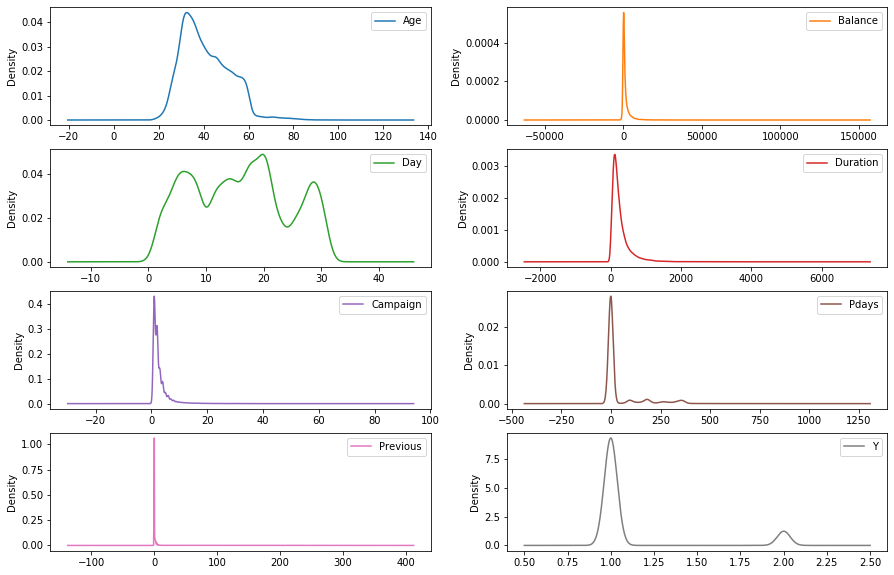

In [54]:
#density plots for all numerical values
bank_num.plot(kind='kde',subplots=True,sharex=False,layout=(4,2),figsize=(15,10))
plt.show()

In [55]:
#categorical data
bank_cat=bank.select_dtypes(exclude=np.number)
bank_cat.head(2)

,job,Martial,Education,Defaultcredit,Housing,Loan,Contact,Month,Poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown


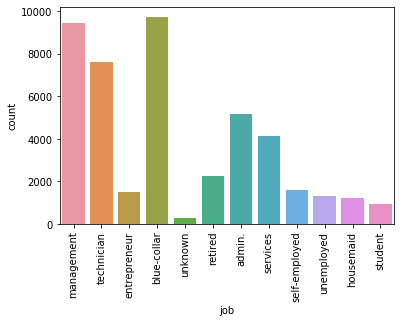

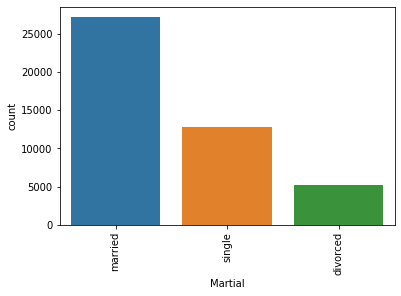

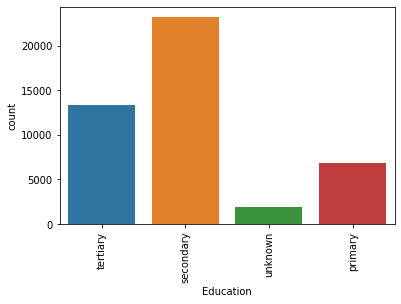

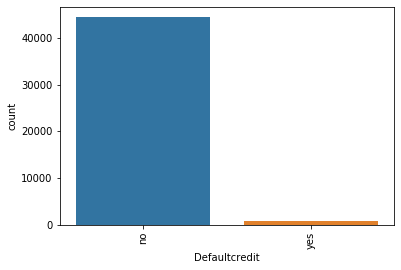

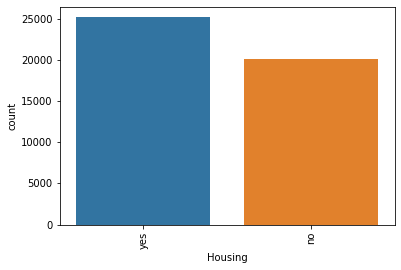

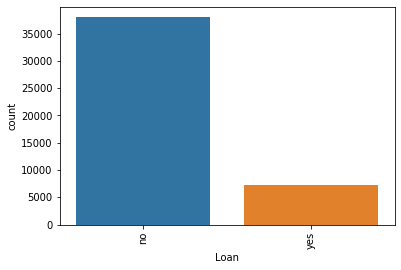

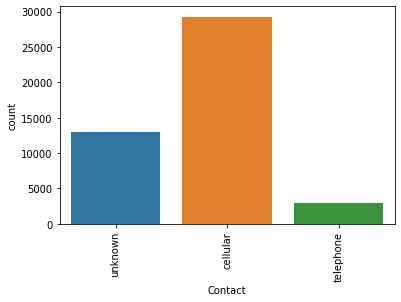

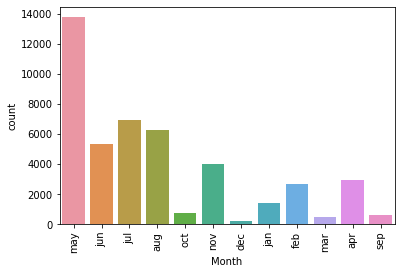

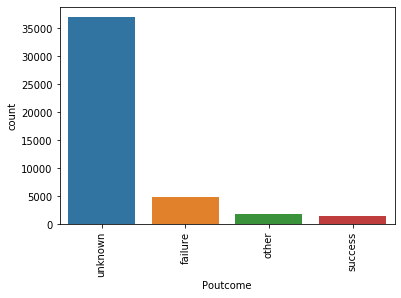

In [56]:
#for categorical data

for i in (bank_cat):
    sb.countplot(bank_cat[i])
    plt.xticks(rotation=90)
    plt.show()

In [57]:
bank_cat.head(2)

,job,Martial,Education,Defaultcredit,Housing,Loan,Contact,Month,Poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown


In [58]:
bank['Y']=bank['Y'].map({1:0,2:1})

In [59]:
#Replacing the categorical data with the binary values

bank['Loan']=bank['Loan'].map({'no':0,'yes':1}).astype('int')

In [60]:
bank['Housing']=bank['Housing'].map({'no':0,'yes':1}).astype('int')

In [61]:
bank['Defaultcredit']=bank['Defaultcredit'].map({'no':0,'yes':1}).astype('int')

In [62]:
bank['Martial']=bank['Martial'].map({'married':1,'single':0,'divorced':0}).astype('int')

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])

In [64]:
bank['Contact']=le.fit_transform(bank['Contact'])

In [65]:
bank['Month']=le.fit_transform(bank['Month'])

In [66]:
bank['Poutcome']=le.fit_transform(bank['Poutcome'])

In [67]:
bank['Education']=le.fit_transform(bank['Education'])

In [68]:
#categorical data
bank_num1=bank.select_dtypes(include=np.number)
bank_num1.head(2)

,Age,job,Martial,Education,Defaultcredit,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,0,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [69]:
#Standard scaling
sc=StandardScaler()
bank_final=sc.fit_transform(bank_num1)
bank_final=pd.DataFrame(bank_final,columns=bank_num1.columns)
bank_final.head(2)

,Age,job,Martial,Education,Defaultcredit,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,1.606965,-0.103820,0.813212,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.011016,-0.569351,-0.411453,-0.25194,0.444898,-0.363983
1,0.288529,1.424008,-1.229691,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.416127,-0.569351,-0.411453,-0.25194,0.444898,-0.363983


In [70]:
bank_target=bank.Y
bank_feature=bank_final.drop(['Y'],1)

In [71]:
print(bank_target.shape)
print(bank_feature.shape)

(45211,)
(45211, 16)


In [72]:
from sklearn.model_selection import train_test_split
X=sm.add_constant(bank_feature)
X_train,X_test,y_train,y_test=train_test_split(X,bank_target,random_state=48,test_size=0.2)
#split the train and test data are 80% and 20%

In [73]:
#shape of the train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36168, 17)
(36168,)
(9043, 17)
(9043,)


# Logistic Regression

In [125]:
log=sm.Logit(y_train,X_train).fit()
log.summary()

Optimization terminated successfully.
         Current function value: 0.267601
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36151
Method:                           MLE   Df Model:                           16
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:                  0.2559
Time:                        13:59:38   Log-Likelihood:                -9678.6
converged:                       True   LL-Null:                       -13007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.7000      0.026   -102.558      0.000      -2.752      -2.648
Age               0.0864      0.019      4.668      0.000       0.050       0.123
job               0.0253      0.020      1.286      0.198      -0.013       0.064
Martial          -0.1505      0.020     -7.608      0.000      -0.189      -0.112
Education         0.1556      0.019      8.074      0.000       0.118       0.193
Defaultcredit    -0.0368      0.024     -1.561      0.119      -0.083       0.009
Balance           0.0602      0.015      3.894      0.000       0.030       0.091
Housing          -0.5230      0.021    -24.875      0.000      -0.564      -0.482
Loan             -0.2472      0.023    -10.637      0.000      -0.293      -0.202
Contact          -0.5721      0.027    -21.156      0.000      -0.625      -0.519
Day              -0.0369      0.019     -1.911      0.056      -0.075       0.001
Month             0.1254      0.019      6.712      0.000       0.089       0.162
Duration          0.9934      0.017     57.019      0.000       0.959       1.028
Campaign         -0.4040      0.035    -11.562      0.000      -0.473      -0.336
Pdays             0.3737      0.028     13.226      0.000       0.318       0.429
Previous          0.2013      0.021      9.667      0.000       0.160       0.242
Poutcome          0.2225      0.032      6.928      0.000       0.160       0.285
=================================================================================
"""

In [75]:
#y prdict probability
y_pred_prob=log.predict(X_test)
y_pred_prob.head()

41327    0.072343
3779     0.008588
12557    0.020351
9067     0.024011
34161    0.116098
dtype: float64

In [76]:
#Target variable contain 0 and 1 so decide to cuttoff with 0.5
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [77]:
#Accuracy_score
print(accuracy_score(y_test,y_pred))

0.8910759703638174


# Ensemble technique (Bagging)

In [78]:
#ensemble technique using bagging classifier

lr=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
bag_lr=BaggingClassifier(base_estimator=lr)
bag_gnb=BaggingClassifier(base_estimator=gnb)
bag_knn=BaggingClassifier(base_estimator=knn)
bag_dt=BaggingClassifier(base_estimator=dt)

In [79]:
#fit the data

lr.fit(X_train,y_train)
gnb.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
bag_lr.fit(X_train,y_train)
bag_gnb.fit(X_train,y_train)
bag_knn.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [80]:
#predict the data 

y_pred_lr=lr.predict(X_test)
y_pred_gnb=gnb.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_bag_lr=bag_lr.predict(X_test)
y_pred_bag_gnb=bag_gnb.predict(X_test)
y_pred_bag_knn=bag_knn.predict(X_test)
y_pred_bag_dt=bag_dt.predict(X_test)

In [81]:
print('Accuracy score of LR :       ',accuracy_score(y_test,y_pred_lr))
print('Accuracy score of GNB :      ',accuracy_score(y_test,y_pred_gnb))
print('Accuracy score of KNN :      ',accuracy_score(y_test,y_pred_knn))
print('Accuracy score of DT :       ',accuracy_score(y_test,y_pred_dt))
print('Accuracy score of BAG_LR :    ',accuracy_score(y_test,y_pred_bag_lr))
print('Accuracy score of BAG_GNB :   ',accuracy_score(y_test,y_pred_bag_gnb))
print('Accuracy score of BAG_KNN :   ',accuracy_score(y_test,y_pred_bag_knn))
print('Accuracy score of BAG_DT :    ',accuracy_score(y_test,y_pred_bag_dt))
#Bagging of decision tree having high accuracy compare to other models

Accuracy score of LR :        0.8910759703638174
Accuracy score of GNB :       0.8329094327103838
Accuracy score of KNN :       0.895388698440783
Accuracy score of DT :        0.8732721441999336
Accuracy score of BAG_LR :     0.891850049762247
Accuracy score of BAG_GNB :    0.8351210881344686
Accuracy score of BAG_KNN :    0.8952781156695787
Accuracy score of BAG_DT :     0.8983744332632976


In [177]:
#Train and test report

train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)
print('train_score of LinearRegression :', train_score)
print('test_score of LinearRegression :',test_score)

print('----------------------------')

train_score=gnb.score(X_train,y_train)
test_score=gnb.score(X_test,y_test)
print('train_score of Gausian naive bayes :', train_score)
print('test_score of Gausian naive bayes :',test_score)

print('------------------------------')

train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
print('train_score of KNN :', train_score)
print('test_score of KNN :',test_score)

print('------------------------------')

train_score=bag_lr.score(X_train,y_train)
test_score=bag_lr.score(X_test,y_test)
print('train_score of  bagging of lr :', train_score)
print('test_score of bagging of lr :',test_score)

print('-------------------------------')

train_score=bag_gnb.score(X_train,y_train)
test_score=bag_gnb.score(X_test,y_test)
print('train_score of bagging gnb :', train_score)
print('test_score of bagging gnb :',test_score)

print('---------------------------------')

train_score=bag_knn.score(X_train,y_train)
test_score=bag_knn.score(X_test,y_test)
print('train_score of bagging of knn :', train_score)
print('test_score of bagging of knn :',test_score)

print('----------------------------------')

train_score=bag_dt.score(X_train,y_train)
test_score=bag_dt.score(X_test,y_test)
print('train_score of bagging decision tree :', train_score)
print('test_score of bagging decision tree :',test_score)

train_score of LinearRegression : 0.891616898916169
test_score of LinearRegression : 0.8910759703638174
----------------------------
train_score of Gausian naive bayes : 0.8352687458526875
test_score of Gausian naive bayes : 0.8329094327103838
------------------------------
train_score of KNN : 0.9182979429329794
test_score of KNN : 0.895388698440783
------------------------------
train_score of  bagging of lr : 0.8917551426675514
test_score of bagging of lr : 0.891850049762247
-------------------------------
train_score of bagging gnb : 0.8361811546118115
test_score of bagging gnb : 0.8351210881344686
---------------------------------
train_score of bagging of knn : 0.9193485954434859
test_score of bagging of knn : 0.8952781156695787
----------------------------------
train_score of bagging decision tree : 0.9920095111700951
test_score of bagging decision tree : 0.8983744332632976


# Decision Tree Classifier


In [117]:
#Base model
decisiontree=DecisionTreeClassifier(random_state=48)
decisiontree=decisiontree.fit(X_train,y_train)
y_pred=decisiontree.predict(X_test)
print('Accuracy score of base decisiontree: ', accuracy_score(y_test,y_pred))

Accuracy score of base decisiontree:  0.8740462235983634


In [119]:
train_score=decisiontree.score(X_train,y_train)
test_score=decisiontree.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#overfitting model

train_score : 1.0
test_score : 0.8740462235983634


In [118]:
#Hyper parameter tuning using Gridsearchcv of decision tree

tuned_param=[{'criterion':['entropy','gini'],'max_depth':[3,9],'min_samples_split':[3,9],
              'min_samples_leaf':[3,9],'max_leaf_nodes':[3,9]}]
dt=DecisionTreeClassifier(random_state=10)
dt_grid=GridSearchCV(estimator=dt,param_grid=tuned_param,cv=15)
dt_grid_model=dt_grid.fit(X_train,y_train)
dt_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [151]:
#Hyper parameter tuning

dt_model=DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=9,min_samples_leaf=3
                                ,min_samples_split=3,random_state=48)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy score of decision tree after tuning process:', accuracy_score(y_test,y_pred))

Accuracy score of decision tree after tuning process: 0.8969368572376424


In [152]:
train_score=dt_model.score(X_train,y_train)
test_score=dt_model.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#it seems like a good mdel

train_score : 0.900575094005751
test_score : 0.8969368572376424


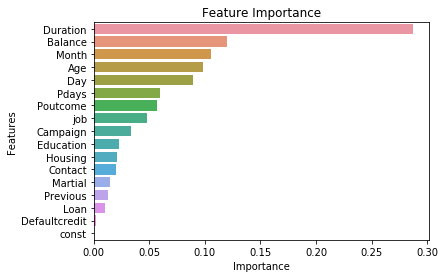

In [155]:
#important features

imp_features=pd.DataFrame({'Features':X_train.columns,'Importance':decisiontree.feature_importances_})
imp_features=imp_features.sort_values('Importance',ascending=False)
sb.barplot(x='Importance',y='Features',data=imp_features)
plt.title('Feature Importance')
plt.show()

# Random Forest Classifier

In [110]:
#base model
random=RandomForestClassifier(random_state=48)
random=random.fit(X_train,y_train)
y_pred=random.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9036824062811014


In [111]:
train_score=random.score(X_train,y_train)
test_score=random.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
# slightly overfitting model

train_score : 1.0
test_score : 0.9036824062811014


In [82]:
tuned_param1=[{'n_estimators':[10,20,30],'criterion':['entropy','gini'],'max_depth':[3,9],'min_samples_split':[3,9],
              'min_samples_leaf':[3,9],'max_leaf_nodes':[3,9]}]
RF=RandomForestClassifier(random_state=48)
RF_grid=GridSearchCV(estimator=RF,param_grid=tuned_param1,cv=5)
RF_grid_model=RF_grid.fit(X_train,y_train)
RF_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 10}

In [148]:
RF=RandomForestClassifier(criterion='gini',n_estimators=10,max_depth=9,max_leaf_nodes=9,min_samples_leaf=3
                                ,min_samples_split=3,random_state=48)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print('Accuracy score of Randomforest after tuning process:', accuracy_score(y_test,y_pred))

Accuracy score of Randomforest after tuning process: 0.8841092557779497


In [149]:
train_score=RF.score(X_train,y_train)
test_score=RF.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#After doing tuning it is a not overfitting or good model

train_score : 0.8900962176509621
test_score : 0.8841092557779497


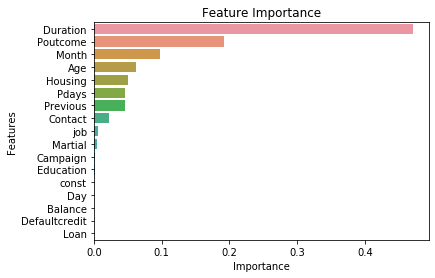

In [150]:
imp_features=pd.DataFrame({'Features':X_train.columns,'Importance':RF.feature_importances_})
imp_features=imp_features.sort_values('Importance',ascending=False)
sb.barplot(x='Importance',y='Features',data=imp_features)
plt.title('Feature Importance')
plt.show()

# Adaboost Classifier

In [90]:
#Base model

from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier(random_state=48)
adaboost.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)
print('Accuracy of Adaboost:',accuracy_score(y_test,y_pred))

Accuracy of Adaboost: 0.8954992812119872


In [96]:
#train and test report

train_score=adaboost.score(X_train,y_train)
test_score=adaboost.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#not overfitting

train_score : 0.8995244414952445
test_score : 0.8954992812119872


In [103]:
#hyper tuning model

param=({'n_estimators':[5,10,20,25,30,40]})
ab=AdaBoostClassifier(random_state=48)
ab_grid=GridSearchCV(estimator=ab,param_grid=param,cv=5,scoring='accuracy')
ab_grid.fit(X_train,y_train)
ab_grid.best_params_

{'n_estimators': 40}

In [106]:
adaboost1=AdaBoostClassifier(n_estimators=40,random_state=48)
adaboost1.fit(X_train,y_train)
y_pred=adaboost1.predict(X_test)
print('Accuracy of Adaboost1:',accuracy_score(y_test,y_pred))

Accuracy of Adaboost1: 0.8936193741015149


In [107]:
train_score=adaboost1.score(X_train,y_train)
test_score=adaboost1.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#Good model

train_score : 0.8980314089803141
test_score : 0.8936193741015149


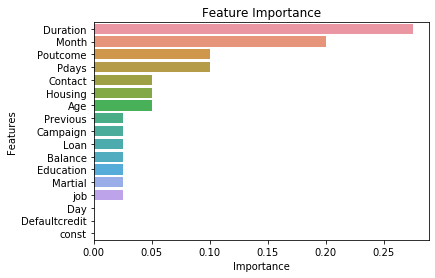

In [139]:
#important features

imp_features=pd.DataFrame({'Features':X_train.columns,'Importance':adaboost1.feature_importances_})
imp_features=imp_features.sort_values('Importance',ascending=False)
sb.barplot(x='Importance',y='Features',data=imp_features)
plt.title('Feature Importance')
plt.show()

# Gradient Boosting

In [129]:
#Base model

from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(random_state=48)
gradient=gradient.fit(X_train,y_train)
y_pred=gradient.predict(X_test)
print('Accuracy score base model of gradient boosting:', accuracy_score(y_test,y_pred))

Accuracy score base model of gradient boosting: 0.9015813336282207


In [130]:
#train and test report

train_score=gradient.score(X_train,y_train)
test_score=gradient.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)

train_score : 0.9093673965936739
test_score : 0.9015813336282207


In [131]:
#hyper tuning model

param=({'n_estimators':[5,10,20,25,30,40]})
gb=GradientBoostingClassifier(random_state=48)
gb=GridSearchCV(estimator=gb,param_grid=param,cv=5,scoring='accuracy')
gb.fit(X_train,y_train)
gb.best_params_

{'n_estimators': 40}

In [135]:
gb1=GradientBoostingClassifier(n_estimators=40,random_state=48)
gb1.fit(X_train,y_train)
y_pred=adaboost1.predict(X_test)
print('Accuracy of Adaboost1:',accuracy_score(y_test,y_pred))

Accuracy of Adaboost1: 0.8936193741015149


In [136]:
train_score=gb1.score(X_train,y_train)
test_score=gb1.score(X_test,y_test)
print('train_score :', train_score)
print('test_score :',test_score)
#Good model

train_score : 0.9044459190444591
test_score : 0.8961627778392126


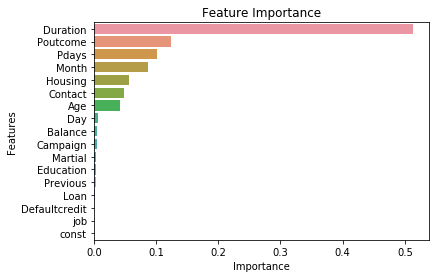

In [138]:
#important features

imp_features=pd.DataFrame({'Features':X_train.columns,'Importance':gb1.feature_importances_})
imp_features=imp_features.sort_values('Importance',ascending=False)
sb.barplot(x='Importance',y='Features',data=imp_features)
plt.title('Feature Importance')
plt.show()

# Stacking Classifier

In [159]:
from sklearn.ensemble import StackingClassifier
level=list()
level.append(('lr',LogisticRegression()))
level.append(('gnb',GaussianNB()))
level.append(('knn',KNeighborsClassifier()))
level.append(('dt',DecisionTreeClassifier()))
level1=LogisticRegression()
model=StackingClassifier(estimators=level,final_estimator=level1,cv=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy of Stacking calssifier:',accuracy_score(y_test,y_pred))

Accuracy of Stacking calssifier: 0.8981532677208891


In [160]:
level1=GaussianNB()

model=StackingClassifier(estimators=level,final_estimator=level1,cv=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy of Stacking calssifier:',accuracy_score(y_test,y_pred))

Accuracy of Stacking calssifier: 0.883777507464337


# RESULTS

In [226]:
result=pd.DataFrame({'Model':[lr,gnb,knn,decisiontree,dt_model,RandomForestClassifier(),RandomForestClassifier(n_estimators=10),AdaBoostClassifier(),AdaBoostClassifier(n_estimators=40),GradientBoostingClassifier(),GradientBoostingClassifier(n_estimators=40),
                              BaggingClassifier(base_estimator=lr),BaggingClassifier(base_estimator=gnb),
                              BaggingClassifier(base_estimator=knn),
                               BaggingClassifier(base_estimator=dt)],
                     'Accuracy':[0.891,0.832,0.895,0.874,0.896,0.903,0.884,0.895,0.893,0.901,0.893,0.891,0.835,0.895,0.898],
                     'Train_score':[0.8916,0.835,0.918,1,0.900,1,0.890,0.899,0.898,0.909,0.904,0.8917,0.8361,0.919,0.992],
                     'Test_score':[0.8910,0.832,0.895,0.874,0.896,0.903,0.884,0.895,0.893,0.901,0.896,0.890,0.8351,0.895,0.8983]})

In [227]:
result

,Model,Accuracy,Train_score,Test_score
0,LogisticRegression(),0.891,0.8916,0.8910
1,GaussianNB(),0.832,0.8350,0.8320
2,KNeighborsClassifier(),0.895,0.9180,0.8950
3,DecisionTreeClassifier(random_state=48),0.874,1.0000,0.8740
4,"DecisionTreeClassifier(max_depth=9, max_leaf_n...",0.896,0.9000,0.8960
5,RandomForestClassifier(),0.903,1.0000,0.9030
6,RandomForestClassifier(n_estimators=10),0.884,0.8900,0.8840
7,AdaBoostClassifier(),0.895,0.8990,0.8950
8,AdaBoostClassifier(n_estimators=40),0.893,0.8980,0.8930
9,GradientBoostingClassifier(),0.901,0.9090,0.9010


In [ ]:
#As per the results GradientBoostingClassifier having high accuracy and good model(not over and underfitting)compare to other 
#models.